In [1]:
import csv
import lzstring
from collections import namedtuple, Counter
import json
from memoize import memoize
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import sys
import json
import matplotlib.pyplot as plt

In [2]:
filepath = 'data/JUL17.csv'
reader = csv.DictReader(open(filepath))

coefficient = {'nothing': 0, 'easy': 1, 'medium': 2, 'hard': 3}


In [3]:
def extract_domain_visit_info(domain_visit_info_compressed):
  domain_visit_info = json.loads(decompressFromEncodedURIComponent(domain_visit_info_compressed))
  output = {}
  for k,v in domain_visit_info.items():
    linedata = domaininfo(*v)
    output[k] = linedata
  return output

In [4]:
csv.field_size_limit(sys.maxsize)

domaininfo = namedtuple('domaininfo', ['num_unique_urls', 'num_unique_urls_typed', 'total_visits', 'total_typed', 'first_visit_time', 'last_visit_time'])
decompressFromEncodedURIComponent = lzstring.LZString().decompressFromEncodedURIComponent

data = []
for item in reader:
    if item['selected_difficulty'] not in ['nothing', 'easy', 'medium', 'hard']:
        continue
    if item['domain_visit_info_compressed'] == None or len(item['domain_visit_info_compressed']) == 0:
        continue
    if int(item['lifetime']) < 1:
        continue
    item['domain_visit_info'] = extract_domain_visit_info(item['domain_visit_info_compressed'])
    data.append(item)

In [5]:
def get_rettention_curve(users):
    days = 60
    curve = []
    for i in range(days):
        curve.append(0)
    for i in range (len(users)):
        for j in range(min(users[i], days)):
            curve[j] += 1
    return curve

all users


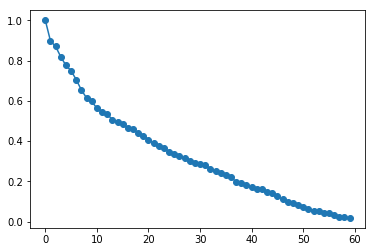

In [6]:
users = []
a = 60
for i in data:
    users.append(int(i['lifetime']))

curve = get_rettention_curve(users)

print ("all users")
x = []
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker='o')


hard
all users


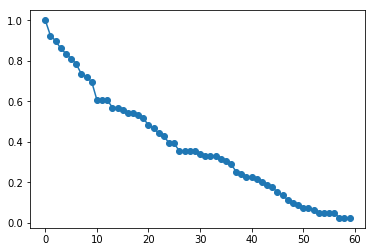

In [7]:
print ('hard')

users =[]
for i in data:
    if i['selected_difficulty'] == 'hard':
        users.append(int(i['lifetime']))

curve = get_rettention_curve(users)

print ("all users")
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker = 'o')



medium
all users


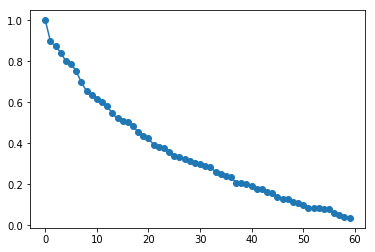

In [8]:
print ('medium')

users =[]
for i in data:
    if i['selected_difficulty'] == 'medium':
        users.append(int(i['lifetime']))

curve = get_rettention_curve(users)

print ("all users")
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker = 'o')



easy
all users


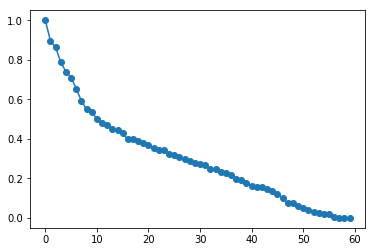

In [9]:
print ('easy')

users =[]
for i in data:
    if i['selected_difficulty'] == 'easy':
        users.append(int(i['lifetime']))

curve = get_rettention_curve(users)

print ("all users")
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker = 'o')



nothing
all users


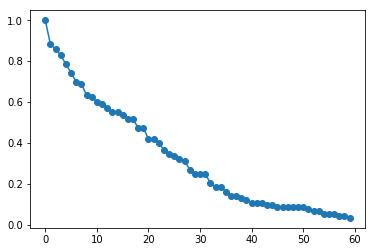

In [10]:
print ('nothing')

users =[]
for i in data:
    if i['selected_difficulty'] == 'nothing':
        users.append(int(i['lifetime']))

curve = get_rettention_curve(users)

print ("all users")
temp = curve[0]
for i in range(a):
    curve[i] /= temp
plt.plot(curve, marker = 'o')



In [36]:
plt.show()

In [11]:
def get_num_visits_for_domain(domain_visit_info, domain):
  info = domain_visit_info.get(domain, None)
  if info != None:
    return info.total_visits
  return 0

def get_all_domains():
  domain_to_num_visits = Counter()
  for line in data:
    domain_visit_info = line['domain_visit_info']
    for domain,info in domain_visit_info.items():
      domain_to_num_visits[domain] += 1
  sorted_by_num_visits = sorted(domain_to_num_visits.items(), key=lambda x: x[1], reverse=True)
  return [x[0] for x in sorted_by_num_visits]


    

In [12]:
domains = get_all_domains()

In [13]:
print (domains)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [19]:
def get_productivity():
    with open ('domain_to_productivity.json') as json_file:
        data = json.load(json_file)
        return data


In [20]:
productivity = get_productivity()

In [21]:
def get_productivity_domain(domain):
    if domain in productivity.keys():
        return productivity[domain]
    domain2 = domain.split('.')
    final = 'www.' + domain2[len(domain2) - 2] + '.com'
    if final in productivity.keys():
        return productivity[final]
    return None

In [22]:
def get_productivity_user(domain_visit_info):
    cnt = 0
    sm = 0
    for domain in domains:
        p = get_productivity_domain(domain)
        if p == None:
            continue
        num = get_num_visits_for_domain(domain_visit_info, domain)
        cnt += num
        sm += num * p
    if cnt > 0:
        sm /= cnt
    return sm


In [23]:
for i in range(len(data)):
    data[i]['producivity'] = get_productivity_user(data[i]["domain_visit_info"])

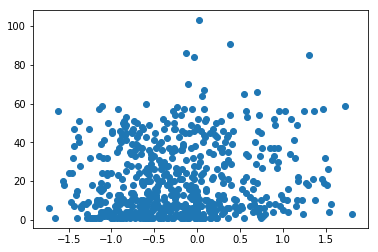

In [24]:
data.sort(key=lambda x: x['producivity'])
x = []
y = []
for i in data:
    x.append(i['producivity'])
    y.append(int(i['lifetime']))

plt.scatter(x, y)
plt.show()

In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
print (y)
lm.fit(np.asarray(x).reshape(len(x), 1), np.asarray(y).reshape(len(x), 1))
print (lm.score(np.asarray(x).reshape(len(x), 1), np.asarray(y).reshape(len(x), 1)))

[6, 1, 56, 20, 18, 24, 9, 24, 32, 7, 47, 38, 13, 1, 15, 43, 40, 51, 28, 6, 7, 8, 8, 1, 3, 9, 47, 32, 1, 1, 18, 1, 1, 7, 1, 9, 10, 57, 33, 1, 16, 2, 10, 1, 8, 19, 15, 4, 39, 59, 16, 24, 32, 16, 4, 41, 2, 9, 18, 5, 32, 4, 2, 24, 23, 5, 4, 50, 4, 13, 3, 4, 24, 1, 3, 1, 3, 45, 46, 3, 1, 7, 5, 10, 35, 8, 1, 5, 23, 57, 13, 4, 37, 12, 46, 1, 8, 41, 13, 40, 3, 11, 1, 21, 44, 17, 1, 9, 50, 11, 49, 51, 2, 44, 48, 2, 45, 4, 25, 49, 41, 1, 53, 3, 8, 29, 2, 4, 8, 9, 4, 4, 3, 9, 35, 1, 34, 14, 28, 46, 11, 45, 7, 7, 39, 18, 47, 14, 13, 51, 33, 4, 2, 1, 36, 3, 22, 10, 10, 39, 50, 43, 28, 38, 3, 45, 24, 7, 1, 4, 34, 5, 37, 10, 3, 6, 37, 2, 48, 20, 9, 7, 3, 19, 10, 47, 18, 7, 1, 1, 1, 6, 25, 7, 20, 7, 3, 25, 1, 60, 43, 27, 14, 14, 10, 7, 24, 8, 4, 15, 1, 3, 25, 20, 10, 49, 36, 23, 1, 20, 13, 26, 3, 32, 32, 34, 1, 4, 29, 1, 1, 6, 5, 8, 7, 33, 26, 41, 14, 8, 12, 45, 7, 16, 7, 22, 12, 13, 8, 37, 10, 8, 17, 15, 7, 21, 2, 18, 7, 20, 31, 6, 39, 3, 1, 6, 1, 1, 1, 29, 26, 40, 4, 27, 36, 20, 1, 52, 3, 12, 23, 47

/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [26]:
print ("no linear relation")

no linear relation


In [27]:
x = []
for i in range(len(data)):
    x.append([data[i]['producivity'], 4 - coefficient[data[i]['selected_difficulty']]])

In [28]:
lm.fit(np.asarray(x).reshape(len(x), 2), np.asarray(y).reshape(len(x), 1))
print (lm.score(np.asarray(x).reshape(len(x), 2), np.asarray(y).reshape(len(x), 1)))

0.02142641398056755


In [29]:
def get_users_with_feature(productivity, difficulty):
    result = []
    for item in data:
        if item['producivity'] < productivity + 1 and item['producivity'] > productivity:
            if difficulty == item['selected_difficulty']:
                result.append(int(item['lifetime']))
    return result

-2
red: nothing yellow : easy blue: medium green : hard


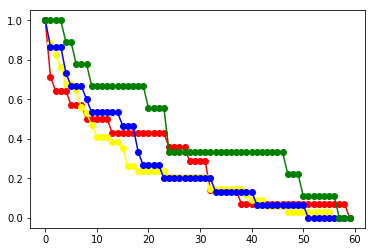

-1
red: nothing yellow : easy blue: medium green : hard


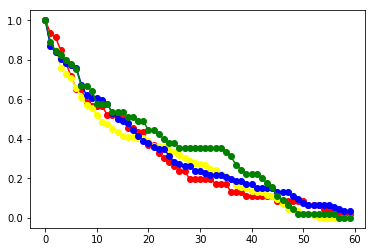

0
red: nothing yellow : easy blue: medium green : hard


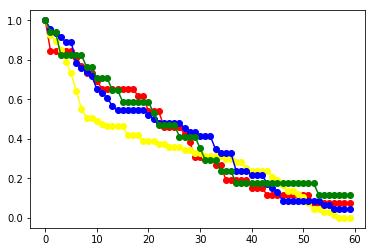

1
red: nothing yellow : easy blue: medium green : hard


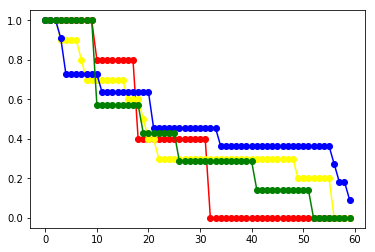

In [41]:
for i in range(-2, 2):
    print (i)
    collor = ['Red', 'Yellow', 'Blue', 'Green']
    ind = 0
    for j in ['nothing', 'easy', 'medium', 'hard']:
        users = get_users_with_feature(i, j)
        curve = get_rettention_curve(users)
        temp = curve[0]
        for k in range(a):
            if temp > 0:
                curve[k] /= temp
        plt.plot(curve, marker='o', color=collor[ind])
        ind += 1
    print ("red: nothing yellow : easy blue: medium green : hard")
    plt.show()
   
        

In [37]:
collors = ['Red', 'Yellow', 'Blue', 'Green']
difficulty = ['nothing', 'easy', 'medium', 'hard']

72
337
156
33
red: (-2, -1) yellow : (-1, 0) blue: (0, 1) green : (1, 2)


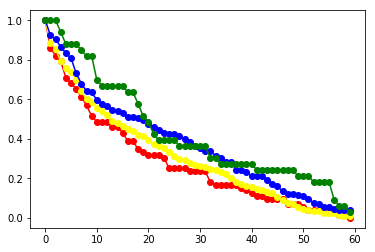

In [42]:
ind = 0
for i in range(-2, 2):
    users = []
    for j in difficulty: 
        users.extend(get_users_with_feature(i, j))
    curve = get_rettention_curve(users)
    temp = curve[0]
    for k in range(a):
        if temp > 0:
             curve[k] /= temp
    print (len(users))
    plt.plot(curve, marker='o', color=collor[ind])
    ind += 1

print ("red: (-2, -1) yellow : (-1, 0) blue: (0, 1) green : (1, 2)")
plt.show()
    

red: nothing yellow : easy blue: medium green : hard


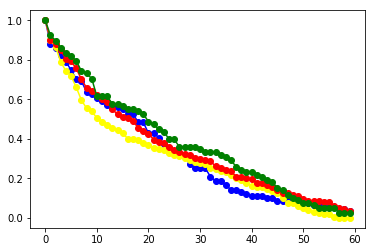

In [40]:
ind = 0
for i in difficulty:
    users = []
    for j in range(-2, 2): 
        users.extend(get_users_with_feature(j, i))
    curve = get_rettention_curve(users)
    temp = curve[0]
    for k in range(a):
        if temp > 0:
             curve[k] /= temp
    plt.plot(curve, marker='o', color=collor[ind])
    ind += 1

print ("red: nothing yellow : easy blue: medium green : hard")
plt.show()